# Machine Learning Model for tariff recommendation 

We have been provided data on customers' behavior who have already switched to mobile tariffs. It would be best if we built a model for the classification problem that will select the appropriate rate. Data preprocessing is not required - the data is already preprocessed.
It is crucial to achieve an accuracy of at least 0.75.

## 1. Open file and import libraries 

### 1.1. Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, RandomizedSearchCV, ParameterGrid

### 1.2. Open file

In [2]:
import pandas as pd
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net//datasets/users_behavior.csv')

### 1.3. Data set Research 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data.head(10) 

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [5]:
data.shape 

(3214, 5)

– 3214 objects, four features. From info(), we received data that the features have different types: 4  features and the target contained in column  is_ultra. The target variable has a binary data type.

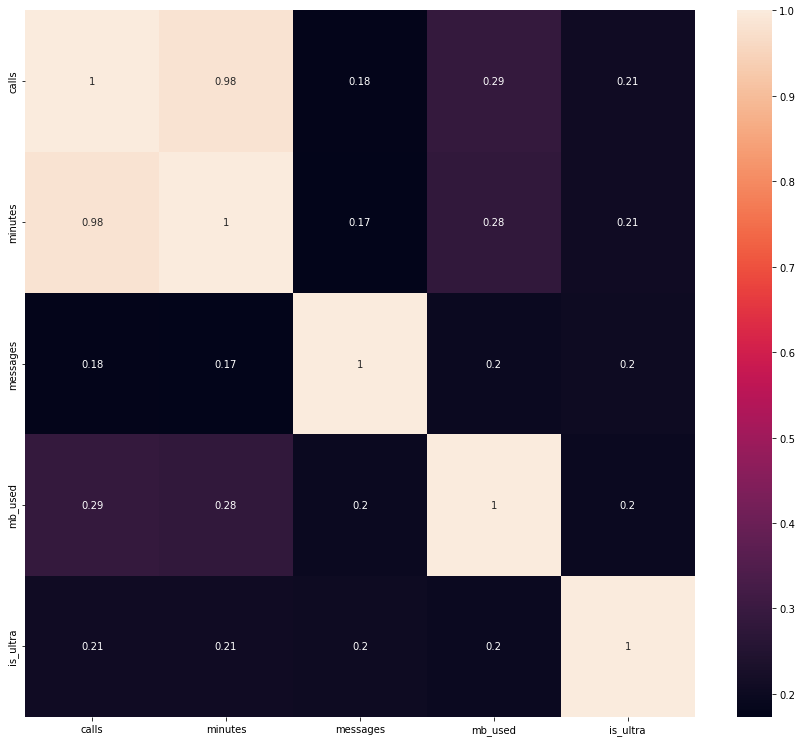

In [6]:
plt.figure(figsize=(15, 13))
sns.heatmap(data.corr(), annot=True);

/Users/daria/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


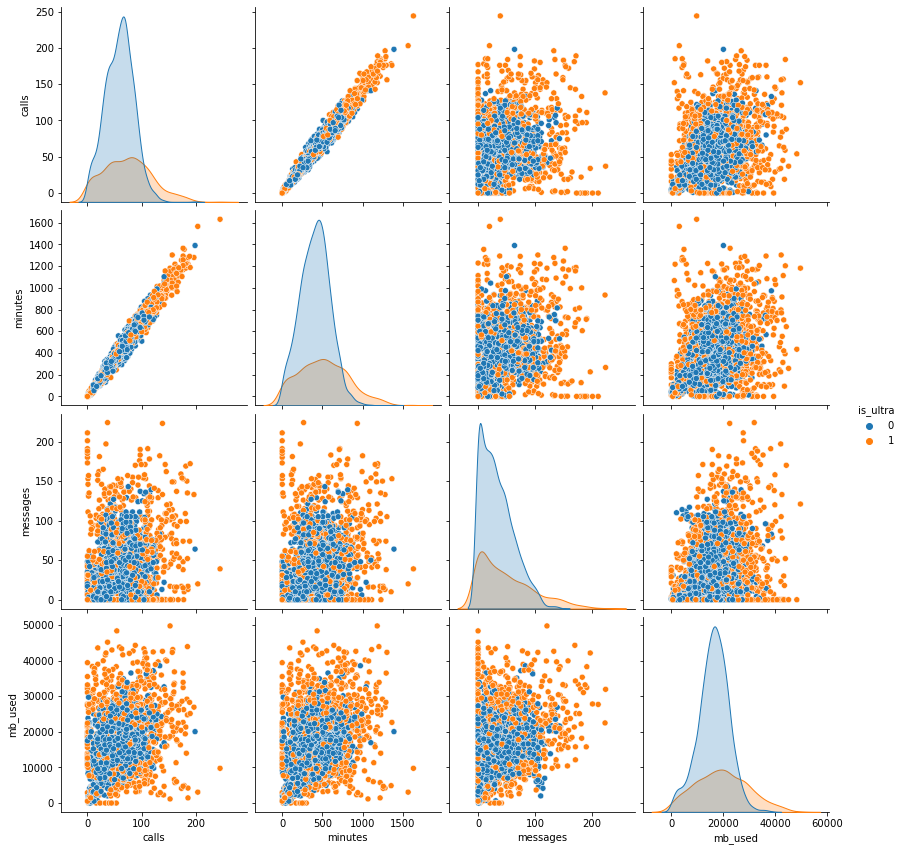

In [7]:
target = "is_ultra"
sns.pairplot(data, hue=target, size=3);

### 1.4. Create a copy of the dataset and remove the minutes feature

In [8]:
data_copy = data.copy()
data_copy = data_copy.drop(['minutes'], axis =1)
data_copy.head()

,calls,messages,mb_used,is_ultra
0,40.0,83.0,19915.42,0
1,85.0,56.0,22696.96,0
2,77.0,86.0,21060.45,0
3,106.0,81.0,8437.39,1
4,66.0,1.0,14502.75,0


In [9]:
data_copy.shape

(3214, 4)

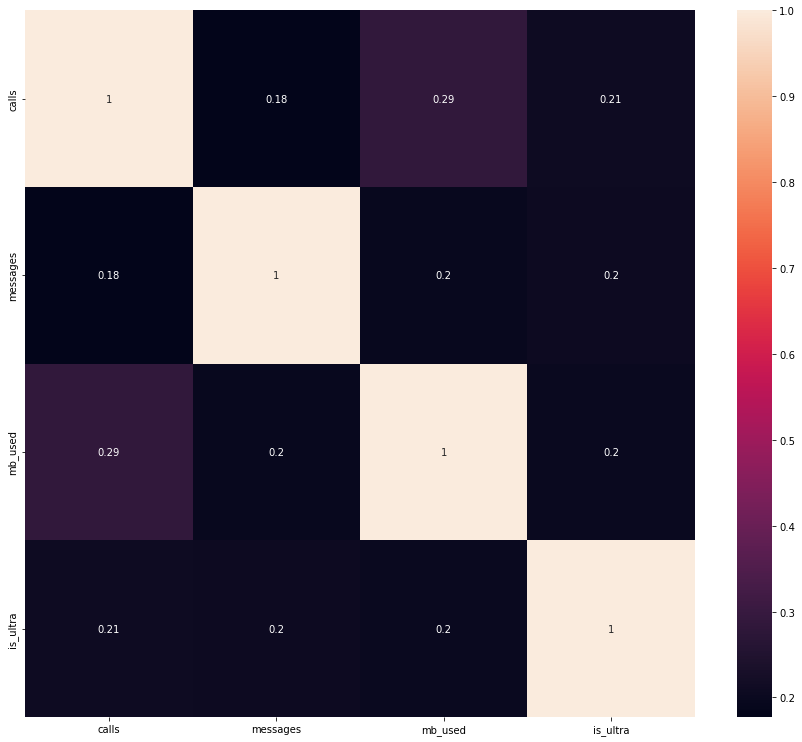

In [10]:
plt.figure(figsize=(15, 13))
sns.heatmap(data_copy.corr(), annot=True);

### 1.5. Intermediate conclusions


– The data is preprocessed and does not require additional processing.

– 3214 objects, four features. From info(), we received data that the features have different types: 4 features and the target contained in column is_ultra. The target variable has a binary data type.

– The heat map shows a high correlation between the calls and minutes features. Such a high correlation can affect the training of the model. There is a hypothesis that logistic regression learns much better when one of the correlated features is removed. To track other correlations, we have prepared an additional visualization. She confirms a strong correlation between these thinking traits.

– To further test this hypothesis, we created a copy of the dataset without the minutes feature to build a logistic regression model. After rendering the model, we observe that the strong correlation has disappeared.

## 2. Split the data into samples

### 2.1. Split into train, valid and test samples

In [11]:
rnd_state = 42 #we introduce the random module and the rnd_state indicator for a fixed separation of samples
np.random.seed(rnd_state)
random.seed(rnd_state)

In [12]:
target = 'is_ultra'
features = ['calls', 'minutes', 'messages', 'mb_used']
X, y = data[features], data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                    random_state=rnd_state, stratify = y)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train, y_train, test_size=0.25, random_state=rnd_state) 

In [13]:
print(f"train = {100*len(X_train)/len(data):.4f}%")
print(f"valid = {100*len(X_valid)/len(data):.4f}%")
print(f"test = {100*len(X_test)/len(data):.4f}%")

train = 59.9876%
valid = 20.0062%
test = 20.0062%


## 3. Model research:
### 3.1. Baseline-model

In [22]:
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train) #создаем baseline для сравнительной оценки с более cложными моделями
dummy_answers = dummy.predict(X_valid)
print(f" Accuracy of a train model: {dummy.score(X_train, y_train):.2f}")

 Accuracy of a train model: 0.58


### 3.2. Decision Tree Classifier

Accuracy of valid sample = 0.713841368584759
Confusion Matrix:


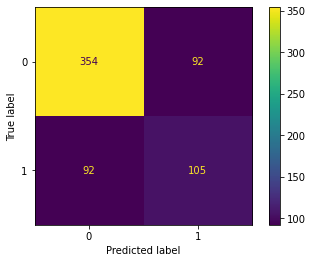

In [23]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_prediction = dt.predict(X_valid)
print('Accuracy of valid sample =', accuracy_score(y_valid, y_prediction))
print('Confusion Matrix:')
conmat = confusion_matrix(y_valid, y_prediction, labels=dt.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conmat,
                               display_labels=dt.classes_)
disp_dt.plot()

plt.show()

### 3.3. Random Forest Classifier

Accuracy of valid sample = 0.7884914463452566
Confusion Matrix:


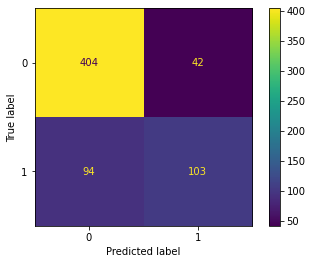

In [24]:
rf = RandomForestClassifier().fit(X_train, y_train)
rf_prediction = rf.predict(X_valid)
print('Accuracy of valid sample =', accuracy_score(y_valid, rf_prediction))
print('Confusion Matrix:')
cm = confusion_matrix(y_valid, rf_prediction, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf.classes_)
disp_rf.plot()

plt.show()

### 3.4. Logistic Regression 

Accuracy of valid sample = 0.6982892690513219
Confusion Matrix:


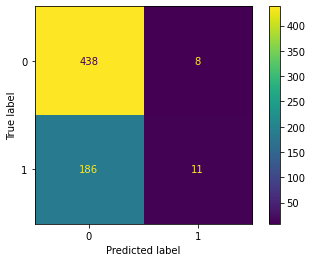

In [25]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_valid)
print('Accuracy of valid sample =', accuracy_score(y_valid, y_pred))
print('Confusion Matrix:')
cm_lr = confusion_matrix(y_valid, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                               display_labels=lr.classes_)
disp.plot()

plt.show()

### 3.5. Hyperparameters Optimization

Depth: 1        Accuracy: 0.7511664074650077
Depth: 2        Accuracy: 0.7822706065318819
Depth: 3        Accuracy: 0.7900466562986003
Depth: 4        Accuracy: 0.776049766718507
Depth: 5        Accuracy: 0.7916018662519441
Depth: 6        Accuracy: 0.7791601866251944
Depth: 7        Accuracy: 0.7947122861586314
Depth: 8        Accuracy: 0.7947122861586314
Depth: 9        Accuracy: 0.7853810264385692




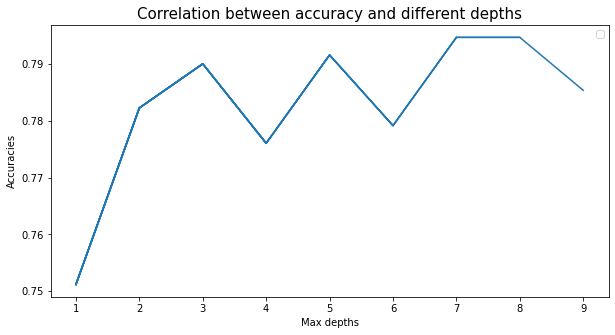

In [27]:
depths = []
dt_accuracy = []

plt.figure(figsize=(10, 5))

for depth in range(1,10):
    dt = DecisionTreeClassifier(random_state=12345, max_depth=depth).fit(X_train,y_train)
    predictions = dt.predict(X_valid)
    score = accuracy_score(y_valid, predictions)
    depths.append(depth)
    dt_accuracy.append(score)
    print('Depth:', depth, end='')
    print('        Accuracy:', score)
    sns.lineplot(data=pd.DataFrame(data=dt_accuracy, index=depths),dashes=False)
    plt.legend('')
print('\n')
plt.title("Correlation between accuracy and different depths", fontsize=15) 
plt.ylabel("Accuracies") 
plt.xlabel("Max depths")

plt.show()

Estimator: 10        Accuracy: 0.7822706065318819
Estimator: 15        Accuracy: 0.776049766718507
Estimator: 20        Accuracy: 0.7869362363919129
Estimator: 25        Accuracy: 0.7838258164852255
Estimator: 30        Accuracy: 0.7884914463452566
Estimator: 35        Accuracy: 0.7947122861586314
Estimator: 40        Accuracy: 0.7947122861586314
Estimator: 45        Accuracy: 0.7962674961119751
Estimator: 50        Accuracy: 0.7931570762052877




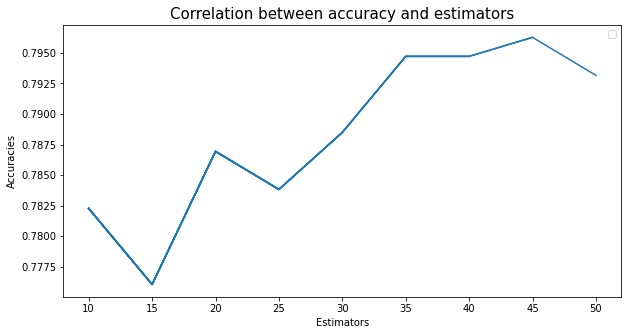

In [28]:
estimators = []
rf_accuracy = []
plt.figure(figsize=(10, 5))

for est in range(10,51,5):
    rf = RandomForestClassifier(random_state=12345, n_estimators=est)
    rf.fit(X_train,y_train)
    predictions = rf.predict(X_valid)
    score = accuracy_score(y_valid, predictions)
    estimators.append(est)
    rf_accuracy.append(score)
    print('Estimator:', est, end='')
    print('        Accuracy:', score)

    sns.lineplot(data=pd.DataFrame(data=rf_accuracy, index=estimators),legend='brief')
    plt.legend('')
print('\n')
plt.title("Correlation between accuracy and estimators", fontsize=15) 
plt.ylabel("Accuracies") 
plt.xlabel("Estimators")
plt.show()
print('\n\n')

## 4. Model test

For testing, we have chosen the Random Forest model because the accuracy of the model on the train/valid samples is the highest. Also, Random Forest is an excellent example of ensembling, which makes the model more "robust". The more trees, the better the quality, but RF setup and running times also increase proportionately.

In [20]:
rf = RandomForestClassifier(random_state=12345, n_estimators=45)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
score = accuracy_score(y_test, predictions)
print('Accuracy:', score)

Accuracy: 0.7993779160186625


## Conclusions 

We have tested four models. First, we created a Baseline model - a simple model that serves as a reference value in the project. We need such models, roughly speaking, to understand the minimum threshold of our accuracy for the following models, i.e., if we get a value less than that of the Baseline model, then something is not working right;

- The baseline model received an accuracy value of 0.58. Go ahead.

- We have chosen three models for classification problems: random tree, random forest and logistic regression.

- Changing the hyperparameters allowed us to calculate at what value of estimators we get the highest accuracy for Random Forest. During the study of models, the Random Tree showed the best results for the accuracy of the validating sample and the values of the error matrix.

- Next, we tested the model with the best parameters. The accuracy value became 0.79. The minimum threshold in accuracy not less than 0.75 has been reached.
